# PROJECT TOPIC: HEART ATTACK ANALYSIS & PREDICTION

![](download-_1_.JPG)

# Refered from kaggle 

### https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# Problem Statement
###  Predict the Heart Attack based on the features provided.

# Project Contents:

### 1.Support Vector Machine

### 2.Logistic Regression

### 3.Gaussian Naive Bayes

### 4.Naive Bayes Classifier for Multivariante Bernoulli Model

### 5Random Forest Classifier

### 6.Kneighbors Classifier

### 7.Gradient Boosting for Classification

# 0.Data Dictionary 
- Age : Age of the patient

- Sex : Sex of the patient

- exng: exercise induced angina (1 = yes; 0 = no)

- caa: number of major vessels (0-3)

- cp : Chest Pain type chest pain type
         Value 0: typical angina
         Value 1: atypical angina
         Value 2: non-anginal pain
         Value 3: asymptomatic
     
- trtbps : resting blood pressure (in mm Hg)

- oldpeak : ST depression induced by exercise relative to rest

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg : resting electrocardiographic results

          Value 0: normal
          Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
          Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
          
- thalachh : maximum heart rate achieved
- slp:slope 

# 1.Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2.Load the data from given csv file into dataframe  

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3.Basic Operation of Dataset  
- Top 5 Rows
- Bottom 5 rows
- Information of dataset
- Statistical Information
- Size of attributes

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Observation: 
- To get the number of observation,missing values,datatype and nan values
- All Data in numerical types

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.shape

(303, 14)

# 4.Cleaning the dataset  

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Observation : No null values

# 5.Explotary Data Analysis 

In [7]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


### Observation:
- Number of unique values in each column

In [11]:
print('Youngest age: ',min(df.age))
print('Oldest age : ',max(df.age))

Youngest age:  29
Oldest age :  77


### Observation:
- To Know Youngest age and oldest in age

In [12]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

### Observation:
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

In [13]:
s=df[["sex", "output"]].groupby(['sex'], as_index=False).mean()
print (s)

   sex    output
0    0  0.750000
1    1  0.449275


### Observation:
- 0:Female   1:Male
- female has more chance than male to heart attack , about 75% female are at risk.

# 6.Data Visualization 

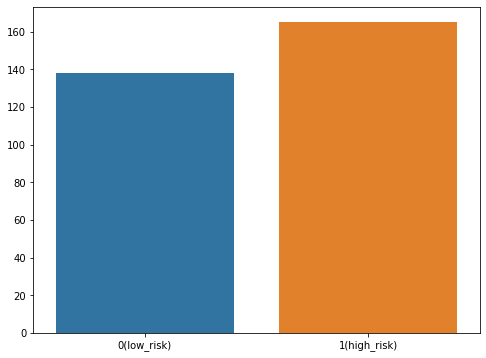

In [14]:
counts = df["output"].value_counts().sort_values()
diag_cols = ["0(low_risk)", "1(high_risk)"]
diag_counts = [counts[0], counts[1]]
plt.figure(figsize = (8, 6))
sns.barplot(x = diag_cols, y = diag_counts)
plt.show()

### Observation:

- 165 people are in risk zone that means have a chance of heart attack

- 138 people are in low risk zone that means have a less chance of heart attack

- total people 303 , among them 165 people have a more chance in heart attack another 138 people have less chance.

<AxesSubplot:title={'center':'Male & Female have heart attack'}, ylabel='output'>

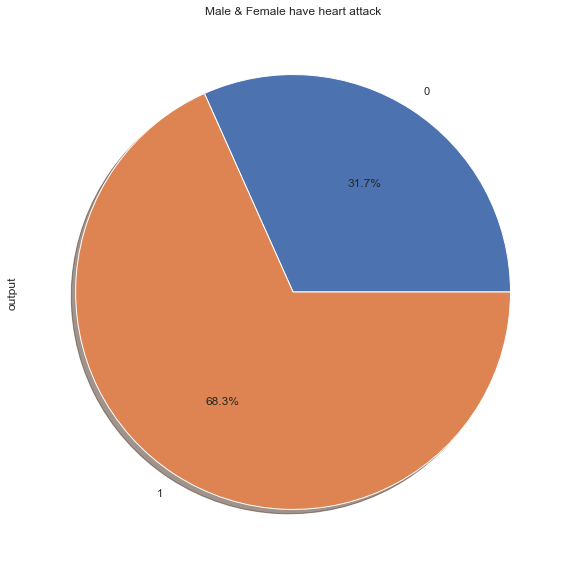

In [12]:
#using groupby make Percentage of patients
df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female have heart attack")

### Observation:
 Gender of the patients
 
- 1 = 68.3% are male

- 0 = 31.7% are female

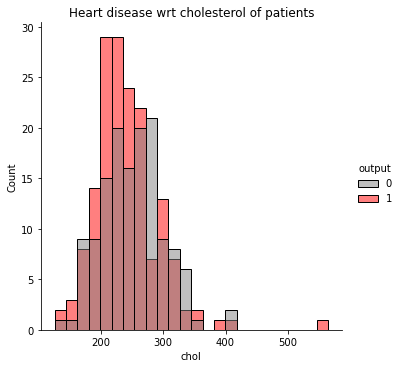

In [16]:
sns.displot(x= df['chol'], hue = df['output'], palette= ['grey', 'red'])
plt.title('Heart disease wrt cholesterol of patients')
plt.show()

### Observation:
- Patients have higher chanaces of getting heart attack, that have cholesterol in range of 190 - 300 mg/dl.

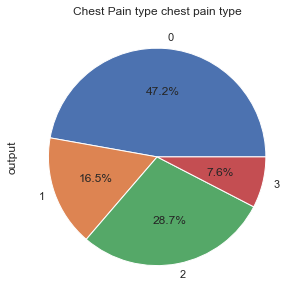

In [11]:
pie = df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',figsize=(5,5),
                title="Chest Pain type chest pain type")
plt.show()

### Observation:
cp : Chest Pain type chest pain type
- 0 : asymptomatic 47.2%
- 1 : typical angina 16.5%
- 2 : atypical angina 28.7 %
- 3 : non-anginal pain 7.6 %

<AxesSubplot:title={'center':'Relationship between Age and have patients heart '}, xlabel='age'>

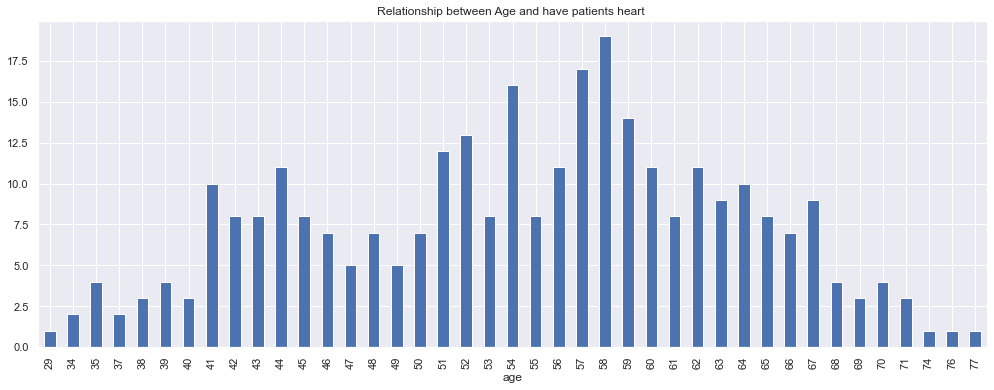

In [13]:
df.groupby('age')["output"].count().plot(kind="bar",figsize=(17,6), title="Relationship between Age and have patients heart ")

### Observation:
- The vast majority of patients are between 50 and 60.

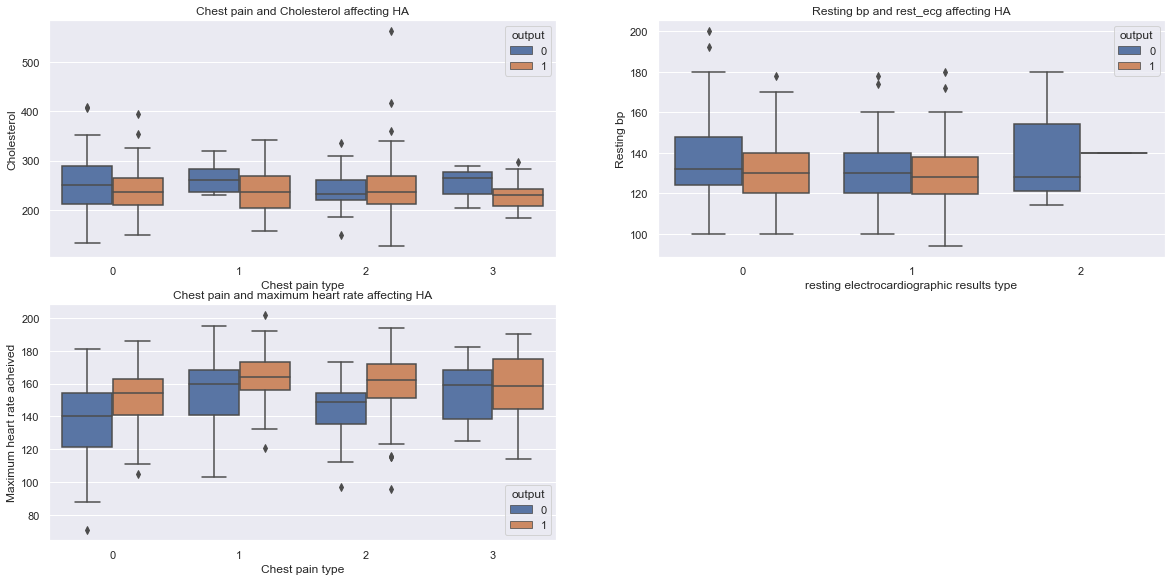

In [18]:
fig=plt.figure(figsize=(20, 20))
fig = plt.subplot(421)
sns.boxplot(x = 'cp', y= 'chol', hue = 'output', data = df)
plt.xlabel('Chest pain type')
plt.ylabel('Cholesterol')
plt.title('Chest pain and Cholesterol affecting HA')

fig = plt.subplot(422)
sns.boxplot(x= 'restecg', y = 'trtbps', hue = 'output', data = df)
plt.xlabel('resting electrocardiographic results type')
plt.ylabel('Resting bp')
plt.title('Resting bp and rest_ecg affecting HA')

fig = plt.subplot(423)
sns.boxplot(x = 'cp', y= 'thalachh', hue = 'output', data = df)
plt.xlabel('Chest pain type')
plt.ylabel('Maximum heart rate acheived')
plt.title('Chest pain and maximum heart rate affecting HA')
plt.show()

### Observation:
Higher heart attack chances in people having:
- 200 - 280 mg/ dl cholesterol with 0, 1, 2 type of chest pain mentioned. 
- Resting bp of 120 - 140 mg HH and resting electrocardiographic results type 0, 1.
- Maximum heart rate around 140 - 180 and chest pain of type 3rd 

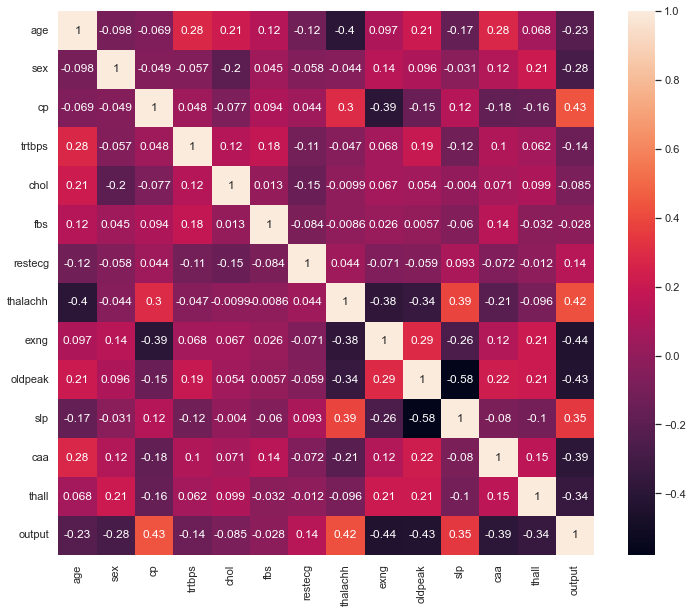

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Observation:
- This correlation matrix show that heart attack depends on cp (Chest pain),thalachh(Maximum heart rate achieved),slp(slope)
- Cp,thalach,slope shows good positive correlation with target
- oldpeah,exang,ca,thal,sex,age show a good negative correlation with target
- dbs,chol,trestbps,restecg has low correlation with our target

# 7.Machine Learning Algorithm   
### Machine Learning algorithms are the programs that can learn the hidden patterns from the data, predict the output, and improve the performance from experiences on their own.


## Following algorithm Use:
   1.SUPPORT VECTOR MACHINE
   
   2.LOGISTIC REGRESSION
   
   3.GAUSSIAN NAIVE BAYES
   
   4.NAIVE BAYES CLASSIFIER FOR MULTIVARIATE BERNOULLI MODELS 
   
   5.RANDOM FOREST CLASSIFIER 
   
   6.KNEIGHBORS CLASSIFIER    
   
   7.GRADIENT BOOSTING FOR CLASSIFICATION    

## Dependent and Independent Variable


In [20]:
x=df.drop(['output'],axis=1)
y=df.output
print("Shape of X:",x.shape,"\n Shape of Y:",y.shape)

Shape of X: (303, 13) 
 Shape of Y: (303,)


 ## Spliting Data (Train and Test Part)  
- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 53)

In [22]:
print("Shape of x train:",x_train.shape,"\nShape of y train:", y_train.shape)
print("Shape of x test:",x_test.shape,"\nShape of y test:", y_test.shape)

Shape of x train: (257, 13) 
Shape of y train: (257,)
Shape of x test: (46, 13) 
Shape of y test: (46,)



## Importing Metrics Libraries of Sklearn  

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

## StandardScaler
- Standardize features by removing the mean and scaling to unit variance.
- StandardScaler() function to standardize the data values into a standard format.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### NOTE: 
- We are creating a new dataset because we will examine many models and there will be many metric scoring to evaluate them collectively.

In [25]:
acc_df = pd.DataFrame(columns=["Name", "Accuracy_score","F1_score"])

## 7.1.Support Vector Machine 
- A support vector machine or SVM is a supervised learning algorithm that can also be used for classification and regression problems. However, it is primarily used for classification problems. The goal of SVM is to create a hyperplane or decision boundary that can segregate datasets into different classes.
- Some real-life applications of SVM are face detection, image classification, Drug discovery, etc. Consider the below diagram:

In [26]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train,y_train)
y_pred= model_svc.predict(x_test)

acc_svc = accuracy_score(y_test, y_pred)*100
f1_svc = f1_score(y_test, y_pred)*100

print("The test accuracy score is ", acc_svc)
print("The test F1 score is", f1_svc)


The test accuracy score is  86.95652173913044
The test F1 score is 86.36363636363636


In [27]:
#Confusion matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",confusion_mat)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix: 
 [[21  3]
 [ 3 19]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.86      0.86      0.86        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



## 7.2.Logistic Regression
- Logistic regression is the supervised learning algorithm, which is used to predict the categorical variables or discrete values. It can be used for the classification problems in machine learning, and the output of the logistic regression algorithm can be either Yes or NO, 0 or 1, Red or Blue, etc.

In [28]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)*100
f1_lr = f1_score(y_test, y_pred)*100

print("The test accuracy score is ", acc_lr)
print("The test F1 score is", f1_lr)


The test accuracy score is  86.95652173913044
The test F1 score is 86.95652173913044


In [29]:
#Confusion matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",confusion_mat)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix: 
 [[20  4]
 [ 2 20]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.83      0.91      0.87        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



## 7.3.Gaussian Naive Bayes    

- Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution. An approach to create a simple model is to assume that the data is described by a Gaussian distribution with no co-variance (independent dimensions) between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label.

In [30]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB().fit(x_train, y_train)
y_pred = model_gnb.predict(x_test)

acc_gnb = accuracy_score(y_test, y_pred)*100
f1_gnb = f1_score(y_test, y_pred)*100

print("The test accuracy score is ", acc_gnb)
print("The test F1 score is", f1_gnb)


The test accuracy score is  86.95652173913044
The test F1 score is 86.36363636363636


In [31]:
#Confusion matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",confusion_mat)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix: 
 [[21  3]
 [ 3 19]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.86      0.86      0.86        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



## 7.4 Naive Bayes Classifier for Multivariate Bernoulli Model  

- Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [32]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(x_train, y_train)
y_pred = model.predict(x_test)

acc_nbc = accuracy_score(y_test, y_pred)*100
f1_nbc = f1_score(y_test, y_pred)*100

print("The test accuracy score is ", acc_nbc)
print("The test F1 score is", f1_nbc)


The test accuracy score is  95.65217391304348
The test F1 score is 95.45454545454545


In [33]:
#Confusion matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",confusion_mat)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix: 
 [[23  1]
 [ 1 21]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.95      0.95      0.95        22

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



## 7.5.Random Forest Classifier   

- Random forest is the supervised learning algorithm that can be used for both classification and regression problems in machine learning. It is an ensemble learning technique that provides the predictions by combining the multiple classifiers and improve the performance of the model.

- It contains multiple decision trees for subsets of the given dataset, and find the average to improve the predictive accuracy of the model. 

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth=4).fit(x_train, y_train)  
y_pred = model.predict(x_test)


acc_rf = accuracy_score(y_test, y_pred)*100
f1_rf = f1_score(y_test, y_pred)*100

print("The test accuracy score is ", acc_rf)
print("The test F1 score is", f1_rf)


The test accuracy score is  89.13043478260869
The test F1 score is 88.8888888888889


In [35]:
#Confusion matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",confusion_mat)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix: 
 [[21  3]
 [ 2 20]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.87      0.91      0.89        22

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



## 7.6.KNeighbors Classifier:     
- K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.


In [36]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 4).fit(x_train, y_train)  
y_pred = model.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred)*100
f1_knn= f1_score(y_test, y_pred)*100

print("The test accuracy score is ", acc_knn)
print("The test F1 score is", f1_knn)

The test accuracy score is  89.13043478260869
The test F1 score is 88.37209302325581


In [37]:
#Confusion matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",confusion_mat)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix: 
 [[22  2]
 [ 3 19]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.90      0.86      0.88        22

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



## 7.7.Gradient Boosting for Classification    

- GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage nclasses regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=1).fit(x_train, y_train) 
y_pred = model.predict(x_test)

acc_gb = accuracy_score(y_test, y_pred)*100
f1_gb= f1_score(y_test, y_pred)*100

print("The test accuracy score is ", acc_gb)
print("The test F1 score is", f1_gb)

The test accuracy score is  91.30434782608695
The test F1 score is 90.9090909090909


In [39]:
#Confusion matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",confusion_mat)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix: 
 [[22  2]
 [ 2 20]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.91      0.91      0.91        22

    accuracy                           0.91        46
   macro avg       0.91      0.91      0.91        46
weighted avg       0.91      0.91      0.91        46



In [40]:
model_acc = pd.DataFrame({'Model':['SVC','Logistic Regression','GaussianNB','BernoulliNB','Random Forest','KNN','GradientBoosting'],
                    'Accuracy %':[acc_svc,acc_lr,acc_gnb,acc_nbc,acc_rf,acc_knn,acc_gb],
                    'F1 Score %':[f1_svc,f1_lr,f1_gnb,f1_nbc,f1_rf,f1_knn,f1_gb]})
model_acc.sort_values(by='Accuracy %',ignore_index=True,inplace=True)
model_acc

,Model,Accuracy %,F1 Score %
0,SVC,86.956522,86.363636
1,Logistic Regression,86.956522,86.956522
2,GaussianNB,86.956522,86.363636
3,Random Forest,89.130435,88.888889
4,KNN,89.130435,88.372093
5,GradientBoosting,91.304348,90.909091
6,BernoulliNB,95.652174,95.454545


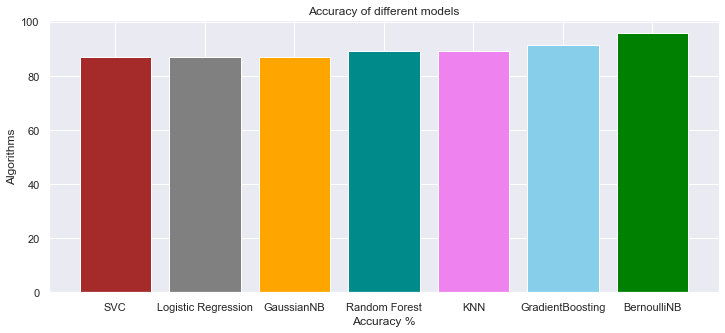

In [41]:
plt.figure(figsize=(12,5))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_acc['Model'],model_acc['Accuracy %'],color=['Brown','grey','orange','darkcyan','violet','skyblue','green'])
plt.show()

# 8.Conclusion:
-  Comparing performance of model through Logistic regression,SVC,GaussianNB,Random forest,KNN,GradientBoosting and BernoulliNB method
- we can see that the model perform well to predict where the patient is classified in havinga higher chance of getting heart attack to having less chance to heart attack.we can also see that BernoulliNB has higher chance of predicting more or less chance of having a heart attack compare to other model.
- BernouliNB model accuracy score is 95% and F1 score is 95% 